<center><h1><strong>FINAL PROJECT - Ex3</strong></h1></center>


* __authors__ = [@diegofrencho](https://ec.linkedin.com/in/diegonoguerav) - [@g30v4](https://github.com/g30v4)
* __date__ = "03/07/2021"
* __version__ = "1.0.0"
* __license__ = "GPL"
* __title__ = "Aprendizaje Automático Aplicado" 

---
## Objetivo :
* Aplicar la metodología CRISP-DM, para aplicar correctamente el modelamiento no supervisado y realizar un análisis a detalle que facilite la conclusión del ejercicio práctico.


## **Ejercicio #3**

En el archivo [crime_data.csv](https://raw.githubusercontent.com/G30v4/MsrtSI_BI-MDA/main/M3_AAA/proj/crime_data.csv) se encuentra el número de crímenes por cada 100.000 habitantes en cada uno de los estados de Estados Unidos, así como el porcentaje de la población que es urbana. Los crímenes se han agrupado en: asalto, asesinato y violación.

Segmenta este conjunto de datos utilizando k-means y obtén los centroides de cada clúster y el listado de los estados en cada uno de los clústeres. Para ello, se ha de encontrar el número óptimo de clúster en el que se divide el conjunto de datos.

### Objetivos Específicos
* Determinar el número óptimo de clústeres
* Obtener los centroides de cada clúster
* Presentar el listado de los estados en cada uno de los clústeres

### Pasos a Realizar
* 1) Carga de Datos (crime_data.csv)
* 2) Exploración y Selección de los datos
* 3) Preparación de Datos
* 4) Modelamiento
* 5) Evaluacion de Modelo
* 6) Conclusiones y Observaciones

## 0) Requisitos Previos

In [95]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas scikit-learn

In [119]:
# Importar librerias
import numpy as np
import pandas as pd # Libreria para analitica de datos
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist # Para calculo de distancias

import warnings
warnings.filterwarnings('ignore')

## 1) Carga de Datos (autos.csv)

In [201]:
# Setear las fuentes de datos
# url = 'crime_data.csv'
url = 'https://raw.githubusercontent.com/G30v4/MsrtSI_BI-MDA/main/M3_AAA/proj/crime_data.csv'

In [202]:
# Carga de datos
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional) 
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [203]:
# Verificamos la dimension del dataframe
print(f"Rows: {len(data.axes[0])} , Cols : {len(data.axes[1])}")

Rows: 50 , Cols : 5





**Explicación:** Se trabajará con un conjunto de 50 registros y 5 variables. 




## 2) Exploración y Selección de los datos

In [204]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [205]:
# Realizamos una descripción de los estadísticos básicos para comprender la data
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [206]:
# Selección de las variables para el modelo
col_names = list(data.columns)
col_names.remove('State') # Eliminamos variable no relevante

sel_data = data[col_names] # Creamos un nuevo dataframe con las variables de interes
sel_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [207]:
# Genera la matriz de correlación
sel_data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Murder,Assault,UrbanPop,Rape
Murder,1.00,0.80,0.07,0.56
Assault,0.80,1.00,0.26,0.67
UrbanPop,0.07,0.26,1.00,0.41
Rape,0.56,0.67,0.41,1.00





**Explicación:** Se puede observar una fuerte correlación entre las variables asaltos y muertes, lo que se podria explicar como: "Por cada asalto es probable que se de una muerte".




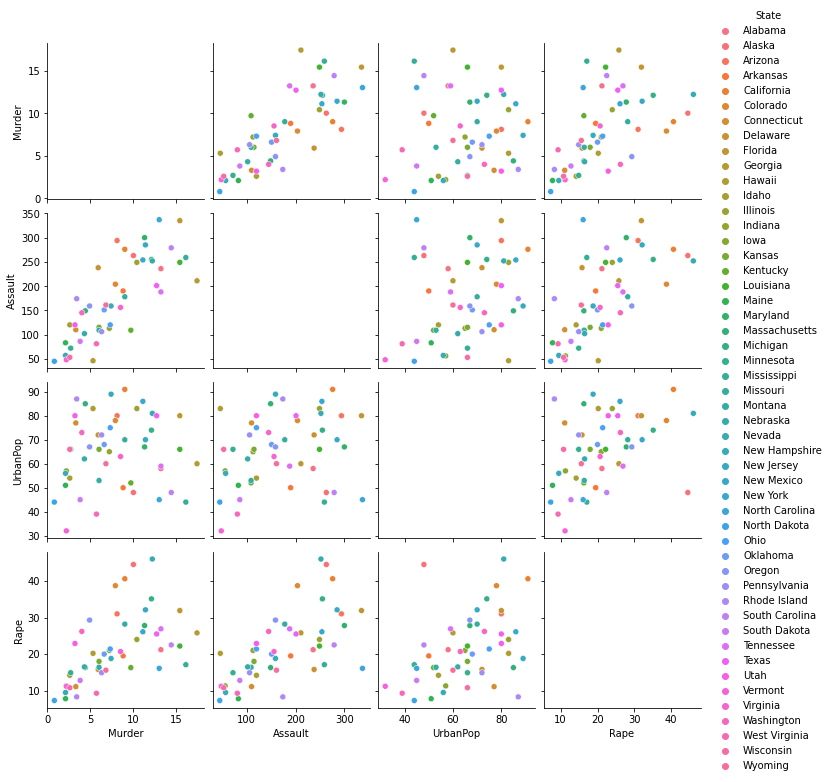

In [208]:
# Grafica de correlaciones respecto a los Estados
sns.pairplot(data,hue="State")

## 3) Preparación de Datos

### Determinar el número óptimo de clústeres

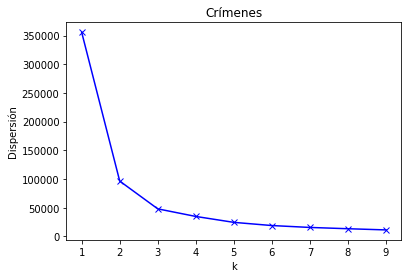

In [209]:
## Por método de Codo
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(sel_data, 'Crímenes')

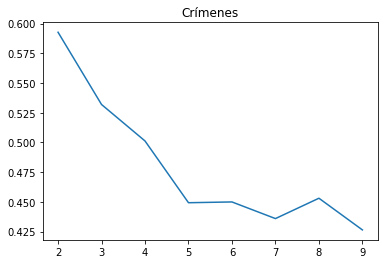

In [210]:
# Método de la Silhouette
def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plt.plot(range(2, max_k), sillhouette_avgs)
    plt.title(figure_name)
    
plot_sillhouette(sel_data, 'Crímenes')

**Interpretación**: Aplicando los dos métodos para determinar el número óptimo de clústeres, se determina que con 2 clústeres es suficiente para la creación del modelo, pero se aplicará 3, considerando los resultados del método del codo. 

## 4) Modelamiento

In [211]:
# Creación del modelo con 3 clústeres
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(sel_data)

### Obtener los centroides de cada clúster

In [212]:
# Obtención de los centroides
kmeans.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  4.27      ,  87.55      ,  59.75      ,  14.39      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

## 5) Evaluacion de Modelo

In [213]:
# Evaluación
clust = kmeans.predict(sel_data) # Realizamos la predicción
# clust
data['predict'] = clust.tolist() # Agregamos la predicción a la data origianl
data

,State,Murder,Assault,UrbanPop,Rape,predict
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


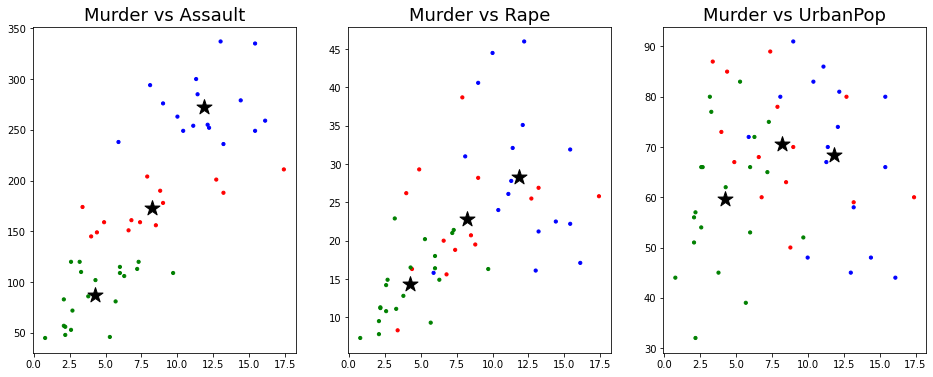

In [214]:
# Graficación de los Clústeres
color_map = np.array(['b','g','r']) ## Seteamos gama de colores

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.title('Murder vs Assault', size=18)
plt.scatter(sel_data['Murder'], sel_data['Assault'], s=10, color = color_map[clust])
plt.scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')

plt.subplot(1, 3, 2)
plt.title('Murder vs Rape', size=18)
plt.scatter(sel_data['Murder'], sel_data['Rape'], s=10, color = color_map[clust])
plt.scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 3],
        marker = '*',
        s = 250,
        color = 'black')

plt.subplot(1, 3, 3)
plt.title('Murder vs UrbanPop', size=18)
plt.scatter(sel_data['Murder'], sel_data['UrbanPop'], s=10, color = color_map[clust])
plt.scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 2],
        marker = '*',
        s = 250,
        color = 'black')


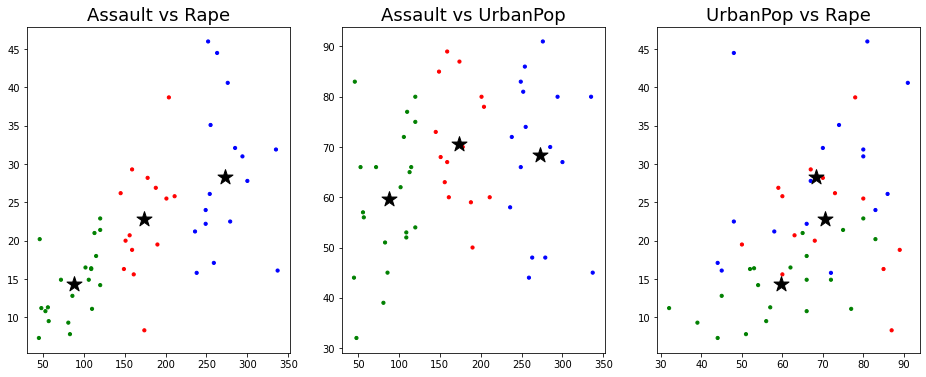

In [215]:
# Graficación de los Clústeres
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.title('Assault vs Rape', size=18)
plt.scatter(sel_data['Assault'], sel_data['Rape'], s=10, color = color_map[clust])
plt.scatter(kmeans.cluster_centers_[:, 1],
        kmeans.cluster_centers_[:, 3],
        marker = '*',
        s = 250,
        color = 'black')

plt.subplot(1, 3, 2)
plt.title('Assault vs UrbanPop', size=18)
plt.scatter(sel_data['Assault'], sel_data['UrbanPop'], s=10, color = color_map[clust])
plt.scatter(kmeans.cluster_centers_[:, 1],
        kmeans.cluster_centers_[:, 2],
        marker = '*',
        s = 250,
        color = 'black')

plt.subplot(1, 3, 3)
plt.title('UrbanPop vs Rape', size=18)
plt.scatter(sel_data['UrbanPop'], sel_data['Rape'], s=10, color = color_map[clust])
plt.scatter(kmeans.cluster_centers_[:, 2],
        kmeans.cluster_centers_[:, 3],
        marker = '*',
        s = 250,
        color = 'black')

### Presentar el listado de los estados en cada uno de los clústeres



**Explicación**: Se puede evidenciar que para los casos: 
* Asaltos vs muertes
* Asaltos vs Violaciones
* Asaltos vs Población urbana

Las agrupaciones son muy evidentes en base a los centroides obtenidos.




In [216]:
# Imprime listado de estados por clúster
for i in range(max(clust) + 1):
    print ("************")
    print ("Clúster", i)
    print (data["State"][clust == i])

************
Clúster 0
0            Alabama
1             Alaska
2            Arizona
4         California
7           Delaware
8            Florida
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
Name: State, dtype: object
************
Clúster 1
6       Connecticut
10           Hawaii
11            Idaho
13          Indiana
14             Iowa
15           Kansas
16         Kentucky
18            Maine
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
34             Ohio
37     Pennsylvania
40     South Dakota
43             Utah
44          Vermont
47    West Virginia
48        Wisconsin
Name: State, dtype: object
************
Clúster 2
3          Arkansas
5          Colorado
9           Georgia
20    Massachusetts
24         Missouri
29       New Jersey
35         Oklahoma
3

In [217]:
# Analizando los resultados predecidos
analisis = data.groupby('predict').agg(["min", "max"]) # agrupamos por cluster
del analisis['State']
# Pintamos las coincidencias maximas de casos con mayor criticidad
analisis.style.apply(lambda x: ["background: red" if v == max(x) else "" for v in x], axis = 0)

## 6) Conclusiones y Recomendaciones


### Conclusiones
* En el analsis exploratorio se observó que existe una alta correlación entre los asaltos y muertes.
* Mediante los dos métodos para determinar el número de clústeres óptimos, nos sugieren un mínimo de 2 e ideal de 3 grupos.
* Del entrenamiento realizado se persive una débil o equivocada agrupación  para las gráficas en los casos :
  * Muertes vs Violaciones.
  * Muertes vs población urbana.
  * Población urbana vs violaciones.
* Se evidencian 3 grupos de casos
  * El Grupo 0, se caracteriza por poseer los estados más seguros, dónde el índice de violencia es bajo comparado con los demás.
  * El Grupo 1, es dónde existe un elevado número de asaltos y violaciones, pero no necesariamente terminan en muerte.
  * El Grupo 2, es dónde existen los estados con mayor índice de mortalidad.

### Recomendaciones
* Se recomienda ejecutar mediante una metodología para obtener un mejor análisis del caso de estudio.
* Se recomienda aplicar al menos dos métodos para determinar el número minimo de clústeres optimos.
* Al identificar malas clisificaciones entre los cruces de variables, se recomienda probar la creación de clusters con otros métodos como pueden ser Aglomerativo, DBSCAN.

